# Homework #1   Due date: 27 October 2022, 11:59 PM

## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear regression (you can use built-in LinearRegression() method). What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    

C:\Users\Ahmet\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

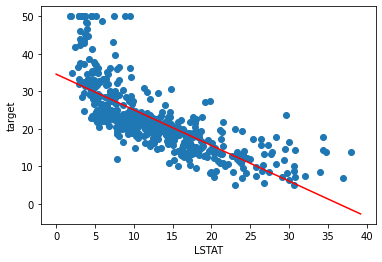

In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn import datasets
from sklearn.linear_model import LinearRegression


data = datasets.load_boston()
bostonDataFrame = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
print(bostonDataFrame.head())
print(bostonDataFrame.describe())


bostonDataFrame.plot.scatter(x='LSTAT',y='target')
X = bostonDataFrame[['LSTAT']]
Y = bostonDataFrame['target']



linearRegression = LinearRegression()
linearRegression.fit(X,Y)
pyplot.scatter(X,Y,marker="o")
f = lambda x: linearRegression.coef_ * x + linearRegression.intercept_
steps = list(np.arange(0,40,.80))   # x-coordinate
fitline = list(map(f, steps))       # y-coordinate
pyplot.plot(steps, fitline, color='red')  #it just plots the line


print()
print("Score -> " , linearRegression.score(X,Y))
print("Coefficient of x -> ", linearRegression.coef_[0])
print("Line ->             " , linearRegression.coef_[0] , "* x +" , linearRegression.intercept_)

## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.

In [10]:
x = bostonDataFrame[['CRIM',    'ZN',    'INDUS', 'CHAS',    'NOX',    'RM',    'AGE',    'DIS',    'RAD',    'TAX',    'PTRATIO',    'B',    'LSTAT']]
y = bostonDataFrame['target']
linearRegression.fit(x,y)



mse = 0
counter = 0
while counter < len(bostonDataFrame):
    mse += (linearRegression.intercept_ + (linearRegression.coef_.T @ x.iloc[counter]) - y.iloc[counter])**2
    counter += 1

mse = mse/len(bostonDataFrame)
print("MSE -> ", mse)

MSE ->  21.894831181729213


C:\Users\Ahmet\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


## Q3) Splitting the dataset
In the lecture we did training and evaluation (score) on the whole Boston dataset. This is bad. Use the code in Week 1 Python Notebook to:
- shuffle the data,
- select 60% of the data as a training set (do the line fitting), 40% as a test set,
- what is the score on the test data?
- what is the mean squared error?

In [9]:

X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], random_state=0, test_size=0.4)
housingdf = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
linearRegression.fit(X_train,y_train)
linearRegression.score(X_train,y_train)


test_Housing = pd.DataFrame(data=np.c_[X_test, y_test],columns= list(data['feature_names']) + ['target'])

X = test_Housing[['CRIM',    'ZN',    'INDUS', 'CHAS',    'NOX',    'RM',    'AGE',    'DIS',    'RAD',    'TAX',    'PTRATIO',    'B',    'LSTAT']]
y = test_Housing['target']


mse2 = 0
counter = 0

while counter < len(test_Housing):
    mse2 += (linearRegression.intercept_ + (linearRegression.coef_.T @ X.iloc[counter]) - y.iloc[counter])**2
    counter += 1

mse2 = mse2/len(test_Housing)
print("MSE -> " , mse2)

MSE ->  25.790362150702475
